# <div align='center'>Perceptron</div>

The perceptron is a simplified model of a biological neuron. Its a supervised machine learning algorithm used in the case of linearly separable binary classification problems. The Perceptron algorithm was one of the first artificial neural networks to be produced and is the building block for one of the most commonly used neural networks, the multilayer perceptron. An interesting consequence of the perceptron's properties is that it is unable to learn an XOR function, the  XOR function is not linearly separable, and therefore the perceptron algorithm (a linear classifier) cannot be used to solve it. This is a principal reason why the perceptron algorithm by itself is not used for complex machine learning tasks, but is rather a building block for a neural network that can handle linearly inseparable classifications.








![pp.png](Images/pp.png)
<br>
<br>
![p.png](Images/p.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [2]:
class Perceptron:
    
    def __init__(self,lr,n_iters):
        
        self.lr = lr
        self.epochs = n_iters
        self.W = None
        self.b = None
        
    def ActivationFn(self,Z):
        
        if(Z >= 0):
            
            return 1
        
        else:
            
            return 0
    
    def fit(self,X,y):
        
        n_features = X.shape[1]
        
        self.W = np.random.normal(0.0,pow(1,-0.5),(n_features,1))
        self.b = np.random.normal(0.0,pow(1,-0.5),(1,1))
        
        for epoch in range(self.epochs):
            for x, y_Gtruth in zip(X,y):
                
                # Summation Step
                Z = np.dot(x,self.W) + self.b
                
                # Activation Step
                y_hat = self.ActivationFn(Z)
                
                #Label = 0 and Predicted = 1
                if((y_Gtruth - y_hat) == -1):
                    
                    self.W -= x.reshape(-1,1) * self.lr
                    self.b -= self.lr
                    
                
                #Label = 1 and Predicted = 0
                elif((y_Gtruth - y_hat) == 1):
                    
                    self.W += x.reshape(-1,1) * self.lr
                    self.b += self.lr
    
        print("Training completed")
    
    
    def predict(self,X):
        
        Z = np.dot(X, self.W) + self.b
        y_hat = self.ActivationFn(Z)
        
        return y_hat
                
    def calc_Accuracy(self, X_test,y_test):
        
        y_hat = []
        y_test = y_test.reshape(-1,1)
        n_samples = y_test.shape[0]
        
        for x in X_test:
            y_hat.append(self.predict(x))
        
        y_hat = np.array(y_hat).reshape(-1,1)
        accuracy = np.sum(y_hat == y_test)/n_samples
        
        return accuracy     

In [3]:
# Linearly Separable Dataset
X_linear, y_linear = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=.9, random_state=0)

In [4]:
# Linear Classifier
clf_linear = Perceptron(0.01, 5000)
clf_linear.fit(X_linear,y_linear)
print('Accuracy for the Linearly Separable Dataset: ', clf_linear.calc_Accuracy(X_linear, y_linear)*100)

Training completed
Accuracy for the Linearly Separable Dataset:  100.0


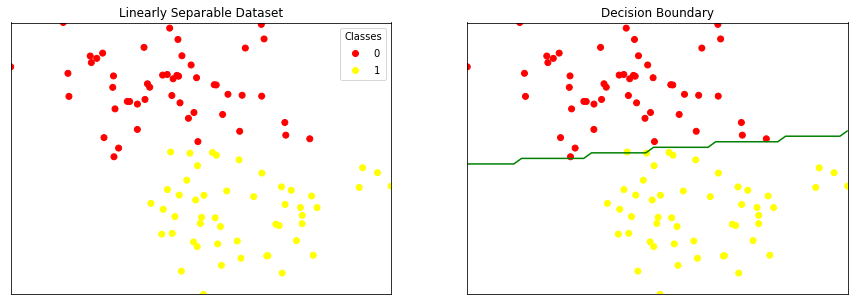

In [5]:
# Visualizing Perceptron

fig, ax = plt.subplots(1,2,figsize=(15,5))


x1_min,x1_max = X_linear[:,0].min(),X_linear[:,0].max()
x2_min,x2_max = X_linear[:,1].min(),X_linear[:,1].max()

xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))
X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(xx1), np.ravel(xx2))])

Zl = []
for x in X:
    Zl.append(clf_linear.predict(x))   
Zl = np.array(Zl).reshape(xx1.shape)


# Perceptron in the case of linearly separable dataset
s1_plot = ax[0].scatter(X_linear[:,0],X_linear[:,1], c=y_linear,cmap='autumn')
legends = ax[0].legend(*s1_plot.legend_elements(),loc="upper right", title="Classes")
ax[0].set_title('Linearly Separable Dataset')
ax[0].set_ylim(x2_min,x2_max)
ax[0].set_xlim(x1_min,x1_max)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].scatter(X_linear[:,0],X_linear[:,1], c=y_linear,cmap='autumn')
ax[1].contour(xx1,xx2,Zl,[0.5],colors='g')
ax[1].set_title('Decision Boundary')
ax[1].set_ylim(x2_min,x2_max)
ax[1].set_xlim(x1_min,x1_max)
ax[1].set_xticks([])
ax[1].set_yticks([])


plt.show()